# **ANALYSIS OF CRIME AGAINST WOMEN FROM 2001-2014**

## **EDA**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 

In [2]:
df=pd.read_csv("/content/Project_Dataset_2.xls")
df.head()

,STATE,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Death,Assault,Insult to Modesty,Cruelty,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [3]:
states=df['STATE'].unique()
print("STATES/UT: \n", states)

STATES/UT: 
 ['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry' 'Telangana'
 'A & N Islands']


In [4]:
df["STATE"]=df.apply(lambda row:row['STATE'].upper(),axis=1)
df["STATE"]=df.apply(lambda row:row['STATE'].replace(" & "," AND "),axis=1)
df["STATE"]=df.apply(lambda row:row['STATE'].replace("&"," AND "),axis=1)

In [5]:
df['STATE'].replace("DELHI UT",'DELHI',inplace=True)
df['STATE'].replace("A AND N ISLANDS",'ANDAMAN AND NICOBAR',inplace=True)
df['STATE'].replace("D AND N HAVELI",'DADRA AND NAGAR HAVELI',inplace=True)

In [6]:
states=df['STATE'].unique()
print("STATES: \n", states)

STATES: 
 ['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU AND KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL'
 'ANDAMAN AND NICOBAR' 'CHANDIGARH' 'DADRA AND NAGAR HAVELI'
 'DAMAN AND DIU' 'DELHI' 'LAKSHADWEEP' 'PUDUCHERRY' 'TELANGANA']


**CHECKING NULL VALUES IF ANY**

In [7]:
df.isnull().sum()

STATE                       0
DISTRICT                    0
Year                        0
Rape                        0
Kidnapping and Abduction    0
Dowry Death                 0
Assault                     0
Insult to Modesty           0
Cruelty                     0
Importation of Girls        0
dtype: int64

In [8]:
df['Total Crimes'] = (df['Rape'] + df['Kidnapping and Abduction'] + df['Dowry Death'] +
                       df['Assault'] + df['Insult to Modesty'] + df['Cruelty'] + df['Importation of Girls'])

## **YEAR BY YEAR ANALYSIS**

In [9]:
def with_hue(data,feature,ax):
    
    categories = len([x for x in data[feature].unique() if x==x])
    bars = ax.patches

    for ind in range(categories):
        hueBars=bars[ind:][::categories] 
        total=sum([x.get_height() for x in hueBars])
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0, bar.get_height(), percentage, ha="center",va="bottom",fontweight='bold',fontsize=10)
       
def without_hue(data,feature,ax):
    
    total = float(len(data))
    bars_plot = ax.patches

    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height() / total)
        x = bars.get_x() + bars.get_width() / 2.0
        y = bars.get_height()
        ax.text(x, y+2, y, ha='center', fontweight='bold', fontsize=7)


In [10]:
df_yearwise = df.groupby(['Year', 'STATE']).sum()
df_yearwise

Rape  Kidnapping and Abduction  Dowry Death  \
Year STATE                                                              
2001 ANDAMAN AND NICOBAR     6                         4            0   
     ANDHRA PRADESH       1742                      1530          840   
     ARUNACHAL PRADESH      66                       110            0   
     ASSAM                1634                      2140          118   
     BIHAR                1776                      1036         1718   
...                        ...                       ...          ...   
2014 TELANGANA            1958                      1422          578   
     TRIPURA               478                       204           66   
     UTTAR PRADESH        6934                     21252         4938   
     UTTARAKHAND           540                       550           76   
     WEST BENGAL          2932                      9952         1002   

                          Assault  Insult to Modesty  Cruelty  \
Year STATE                                                      
2001 ANDAMAN AND NICOBAR       38                  2       18   
     ANDHRA PRADESH          7088               4542    11582   
     ARUNACHAL PRADESH        156                  6       22   
     ASSAM                   1700                  8     2496   
     BIHAR                   1124                 42     3116   
...                           ...                ...      ...   
2014 TELANGANA               6376               2284    12738   
     TRIPURA                  984                 22     1404   
     UTTAR PRADESH          17210                 58    20942   
     UTTARAKHAND              686                  8      602   
     WEST BENGAL            11340               1086    46556   

                          Importation of Girls  Total Crimes  
Year STATE                                                    
2001 ANDAMAN AND NICOBAR                     0            68  
     ANDHRA PRADESH                         14         27338  
     ARUNACHAL PRADESH                       0           360  
     ASSAM                                   0          8096  
     BIHAR                                 166          8978  
...                                        ...           ...  
2014 TELANGANA                               0         25356  
     TRIPURA                                 0          3158  
     UTTAR PRADESH                           0         71334  
     UTTARAKHAND                             0          2462  
     WEST BENGAL                             8         72876  

[491 rows x 8 columns]

In [11]:
df_yearwise_total = df.groupby('Year').sum()
df_yearwise_total

,Rape,Kidnapping and Abduction,Dowry Death,Assault,Insult to Modesty,Cruelty,Importation of Girls,Total Crimes
Year,,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228,261450
2002,32746,29012,13644,67886,20310,98474,152,262224
2003,31694,26592,12416,65878,24650,101406,92,262728
2004,36466,31156,14052,69134,20002,116242,178,287230
2005,36718,31500,13574,68350,19968,116638,298,287046
2006,38696,34828,15236,73234,19932,126256,134,308316
2007,41474,40832,16186,77468,21900,151860,122,349842
2008,42934,45878,16344,80826,24428,162688,134,373232
2009,42794,51482,16766,77422,22018,179092,96,389670


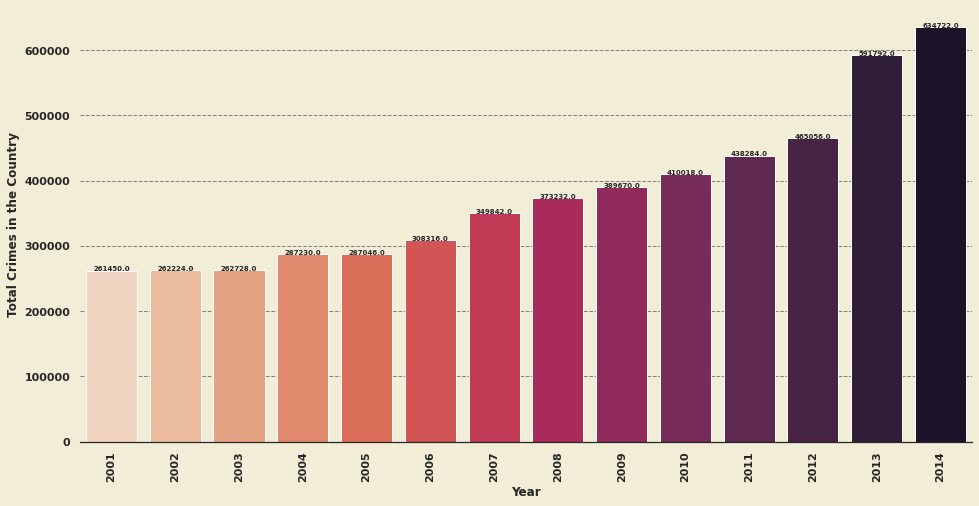

In [12]:
sns.set_theme(style='white',context='notebook')
fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--", axis="y", color='gray')

A=sns.barplot(data=df_yearwise_total, x=np.array([year for year in range(2001,2015)]), y='Total Crimes', palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.ylabel("Total Crimes in the Country", fontweight='bold')
without_hue(df_yearwise_total, 'Total Crimes', A)
plt.show()

In [13]:
def plot_features(rows,cols,cat_columns):
    
    f,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,25))
    f.patch.set_facecolor('#F2EDD7FF')
    #Setting background and foreground color
    for i in range(0,rows):
        for j in range(0,cols):
            ax[i][j].set_facecolor('#F2EDD7FF')

    for i in range(0,rows):
        for j in range(0,cols):
            A=sns.barplot(data=df_yearwise_total,x=df_yearwise_total.index,y=cat_columns[i*(rows-2)+j],palette='rocket',ax=ax[i][j])
            without_hue(df,cat_columns[i-1],A)

            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].spines['right'].set_visible(False)
            ax[i][j].spines['left'].set_visible(False)
            ax[i][j].grid(linestyle="--",axis='y',color='gray')       
    


In [14]:
crimes = [crime for crime in df.columns][3:]

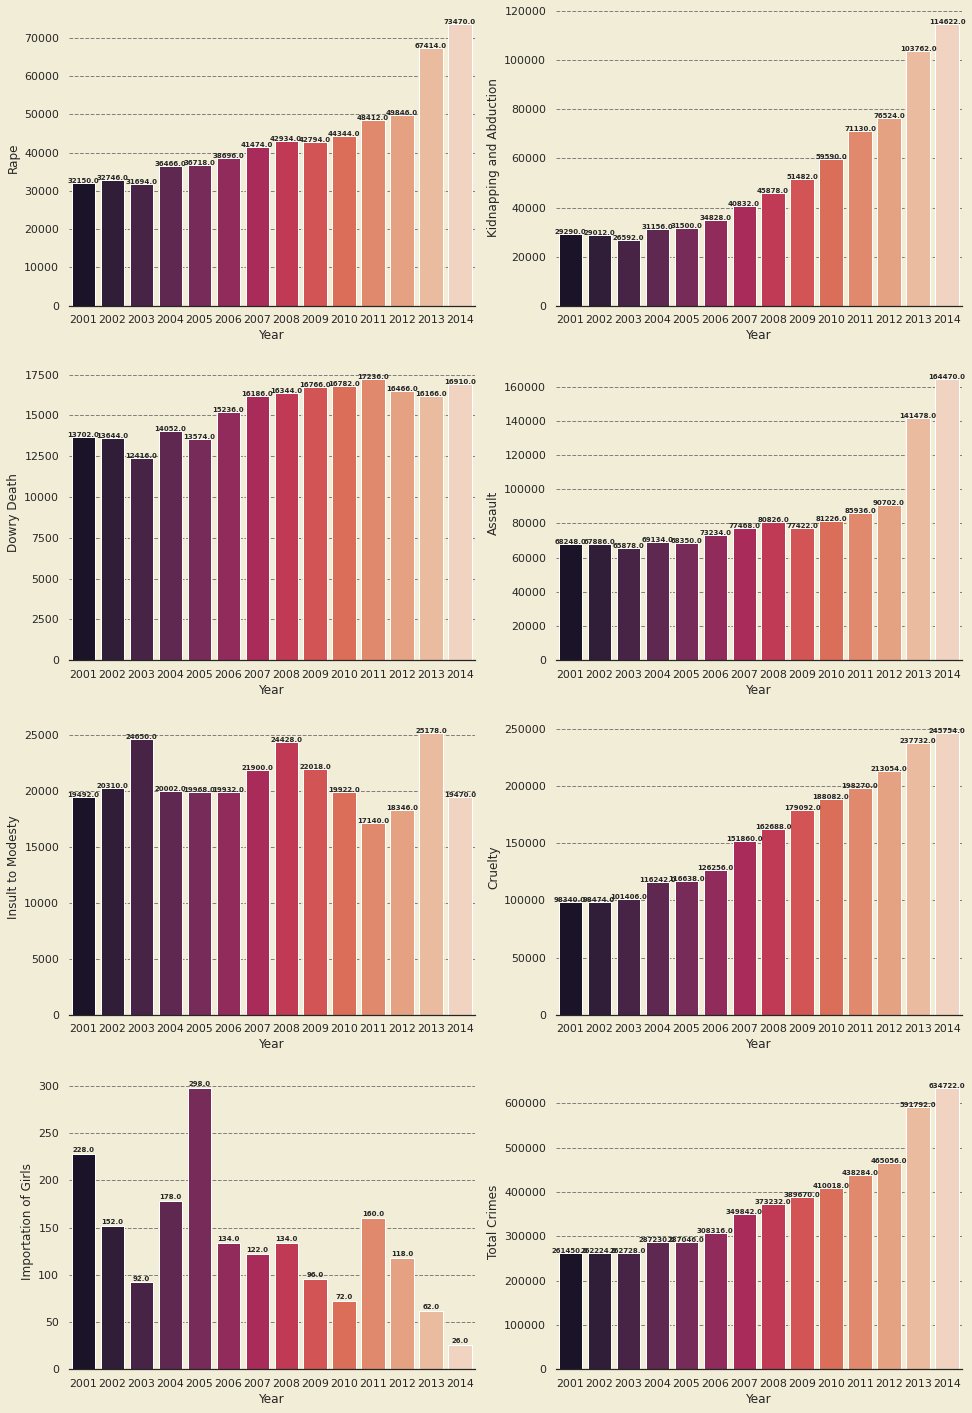

In [15]:
plot_features(4,2, crimes)

## **TOTAL NUMBER  OF CRIMES [2001-2014] BY CATEGORY**

In [16]:
df_crimewise_total=pd.DataFrame(columns=["Crime","Total Cases"])
for i in crimes:
    if i != "Total Crimes":
      df_crimewise_total = df_crimewise_total.append({'Crime':i ,'Total Cases':df_yearwise_total[i].sum()}, ignore_index = True)
df_crimewise_total=df_crimewise_total.sort_values(by='Total Cases',ascending=False)
df_crimewise_total

,Crime,Total Cases
5,Cruelty,2233888
3,Assault,1212258
1,Kidnapping and Abduction,746198
0,Rape,619158
4,Insult to Modesty,292756
2,Dowry Death,215480
6,Importation of Girls,1872


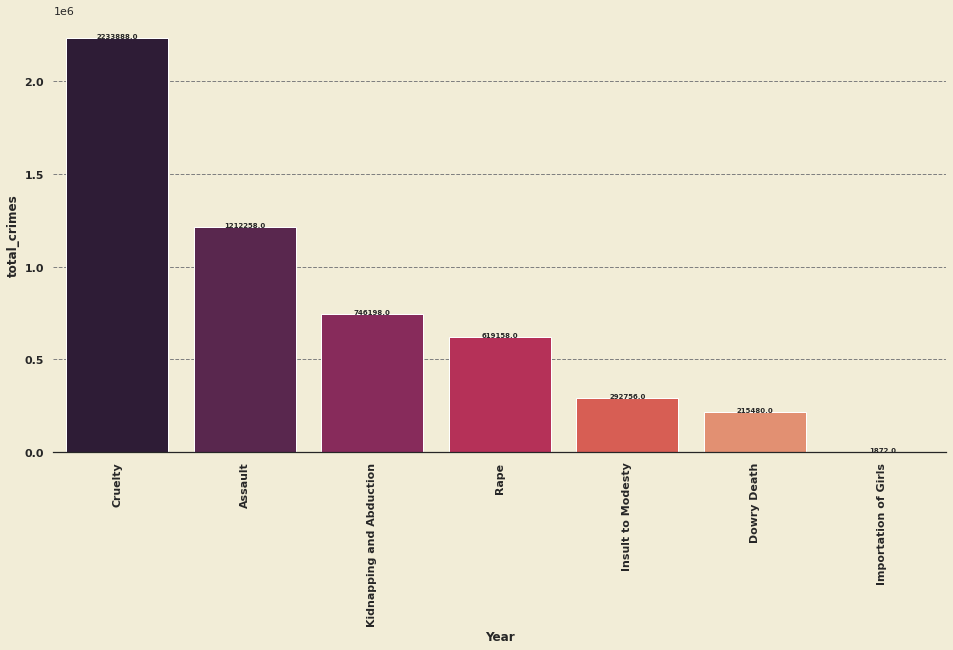

In [17]:
sns.set_theme(style='white',context='notebook')
fig=plt.figure(figsize=(16,8))
ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df_crimewise_total,y='Total Cases',x='Crime',palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
#plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
without_hue(df_crimewise_total,'Total Cases',a)
plt.show()

## **COMPARISION OF CRIMES IN THE COUNTRY BETWEEN 2001 AND 2014**

In [18]:
df_crime_compare = df_yearwise_total.loc[[2001, 2014]]
df_crime_compare

,Rape,Kidnapping and Abduction,Dowry Death,Assault,Insult to Modesty,Cruelty,Importation of Girls,Total Crimes
Year,,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228,261450
2014,73470,114622,16910,164470,19470,245754,26,634722


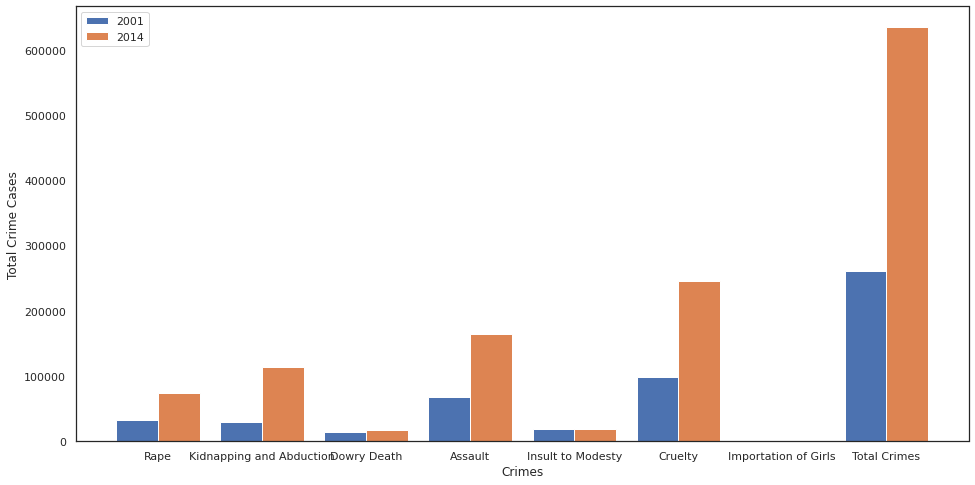

In [19]:
A = [x for x in df_crime_compare.iloc[0] ]
B = [x for x in df_crime_compare.iloc[1] ]

X_axis = np.arange(len(crimes))
plt.figure(figsize=(16,8))
plt.bar(X_axis - 0.2, A, 0.4, label = '2001')
plt.bar(X_axis + 0.2, B, 0.4, label = '2014')
  
plt.xticks(X_axis, crimes)
plt.xlabel("Crimes")
plt.ylabel("Total Crime Cases")
plt.legend()
plt.show()

## **STATE BY STATE ANALYSIS**

In [20]:
df_statewise = df.groupby(['STATE','Year']).sum()
df_statewise

Rape  Kidnapping and Abduction  Dowry Death  \
STATE               Year                                                
ANDAMAN AND NICOBAR 2001     6                         4            0   
                    2002     4                         2            0   
                    2003     4                         4            0   
                    2004    20                         6            0   
                    2005     8                         2            0   
...                        ...                       ...          ...   
WEST BENGAL         2010  4622                      5528         1014   
                    2011  4726                      7422         1020   
                    2012  4092                      8336         1186   
                    2013  3370                      7660          962   
                    2014  2932                      9952         1002   

                          Assault  Insult to Modesty  Cruelty  \
STATE               Year                                        
ANDAMAN AND NICOBAR 2001       38                  2       18   
                    2002       34                  6        8   
                    2003       18                  4       14   
                    2004       12                  6       10   
                    2005       22                  2       10   
...                           ...                ...      ...   
WEST BENGAL         2010     4930                326    35592   
                    2011     4726                400    39544   
                    2012     6690               1112    39730   
                    2013     9826               1154    36232   
                    2014    11340               1086    46556   

                          Importation of Girls  Total Crimes  
STATE               Year                                      
ANDAMAN AND NICOBAR 2001                     0            68  
                    2002                     0            54  
                    2003                     0            44  
                    2004                     0            54  
                    2005                     0            44  
...                                        ...           ...  
WEST BENGAL         2010                    16         52028  
                    2011                     0         57838  
                    2012                    24         61170  
                    2013                    18         59222  
                    2014                     8         72876  

[491 rows x 8 columns]

In [21]:
df_statewise_total=df.groupby('STATE').sum().drop('Year', 1)
df_statewise_total=df_statewise_total.sort_values(by='Total Crimes',ascending=False)
df_statewise_total

<ipython-input-21-b5bbaea98995>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_statewise_total=df.groupby('STATE').sum().drop('Year', 1)


,Rape,Kidnapping and Abduction,Dowry Death,Assault,Insult to Modesty,Cruelty,Importation of Girls,Total Crimes
STATE,,,,,,,,
UTTAR PRADESH,51150,135906,57256,91212,53130,193738,6,582398
ANDHRA PRADESH,32150,34504,13844,126952,86964,280906,34,575354
WEST BENGAL,47876,61158,12308,66908,5348,344124,254,537976
RAJASTHAN,45684,66278,11854,83362,794,262200,14,470186
MADHYA PRADESH,90996,35608,21090,195478,20964,102816,134,467086
MAHARASHTRA,48974,30368,9696,114704,32634,193202,6,429584
ASSAM,40190,62074,3268,38256,254,115300,22,259364
KERALA,20030,4452,700,80438,7930,111626,0,225176
GUJARAT,11644,34670,1108,23186,3230,146468,0,220306


In [22]:
def without_hue_state(data,feature,ax):
    
    total = data['Total Crimes'].sum()
    bars_plot = ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height() / total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,percentage,ha='center',fontweight='bold',fontsize=10)


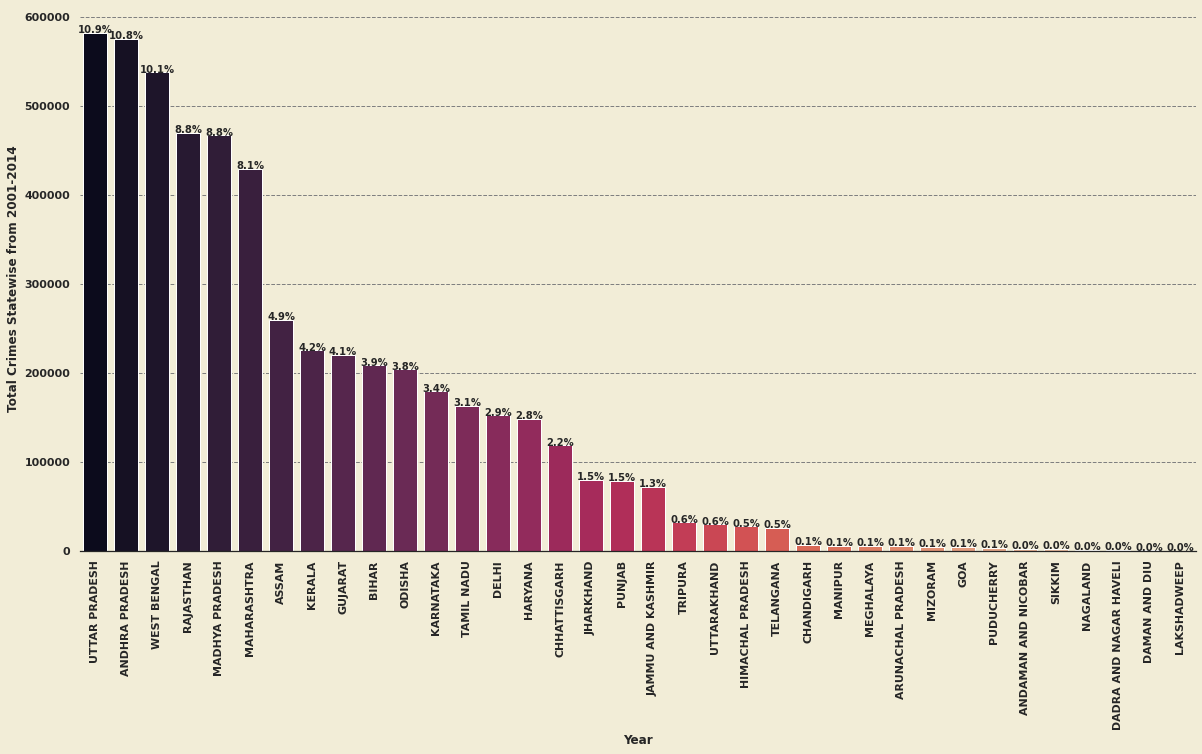

In [23]:
sns.set_theme(style='white',context='notebook')
fig=plt.figure(figsize=(20,10))
ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

A=sns.barplot(data=df_statewise_total,x=df_statewise_total.index,y='Total Crimes',palette='rocket')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("Total Crimes Statewise from 2001-2014",fontweight='bold')
without_hue_state(df_statewise_total,'Total Crimes',A)
plt.show()

## **TOP n STATES WITH HIGHEST NUMBER OF A GIVEN CRIME**

In [24]:
crime = "Dowry Death"
n = 10

In [25]:
df_crime = df_statewise_total.sort_values(by=crime, ascending=False).head(n)
df_crime = df_crime[[crime]]
df_crime

,Dowry Death
STATE,
UTTAR PRADESH,57256
BIHAR,32206
MADHYA PRADESH,21090
ANDHRA PRADESH,13844
WEST BENGAL,12308
RAJASTHAN,11854
ODISHA,10782
MAHARASHTRA,9696
JHARKHAND,7896


Text(0, 0.5, 'Total Number of Dowry Death Statewise in the Country')

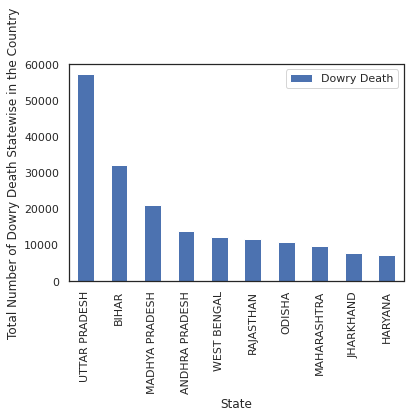

In [26]:
y = df_crime
ax = y.plot.bar()
ax.set_xlabel('State')
ax.set_ylabel('Total Number of {} Statewise in the Country'.format(crime))

## **DETAILED ANALYSIS OF A STATE**

In [27]:
state = 'KARNATAKA'
df_state = df_statewise.loc[state]
df_state

,Rape,Kidnapping and Abduction,Dowry Death,Assault,Insult to Modesty,Cruelty,Importation of Girls,Total Crimes
Year,,,,,,,,
2001,586,542,440,3330,162,3510,0,8570
2002,584,600,466,3296,200,3652,0,8798
2003,642,488,388,3170,168,3408,0,8264
2004,582,572,518,2870,114,3176,0,7832
2005,686,624,522,3170,142,3766,0,8910
2006,800,656,488,3366,76,4258,0,9644
2007,872,780,502,3656,56,5014,0,10880
2008,892,810,518,3908,88,5276,2,11494
2009,1018,816,528,4372,128,6370,4,13236


In [28]:
df_total_crime_state=pd.DataFrame(columns=['Crime',"Total Cases"])
for i in crimes:
  if i!= 'Total Crimes':
    df_total_crime_state=df_total_crime_state.append({'Crime':i ,'Total Cases':df_state[i].sum()}, ignore_index=True)
    
df_total_crime_state=df_total_crime_state.sort_values(by='Total Cases',ascending=False)
df_total_crime_state

,Crime,Total Cases
5,Cruelty,72706
3,Assault,65750
1,Kidnapping and Abduction,16262
0,Rape,15056
2,Dowry Death,7016
4,Insult to Modesty,2276
6,Importation of Girls,94


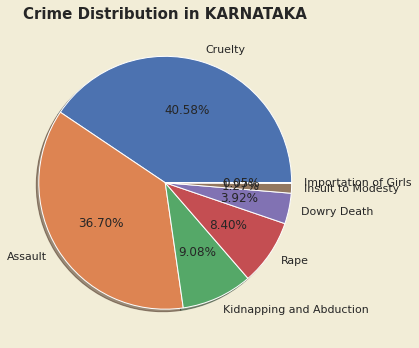

In [29]:
fig=plt.figure(figsize=(20,5))
ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

plt.pie(df_total_crime_state['Total Cases'], labels=df_total_crime_state['Crime'],autopct='%1.2f%%',shadow=True)
plt.title("Crime Distribution in {}".format(state),fontweight='bold',fontsize=15)
plt.tight_layout()
plt.show()

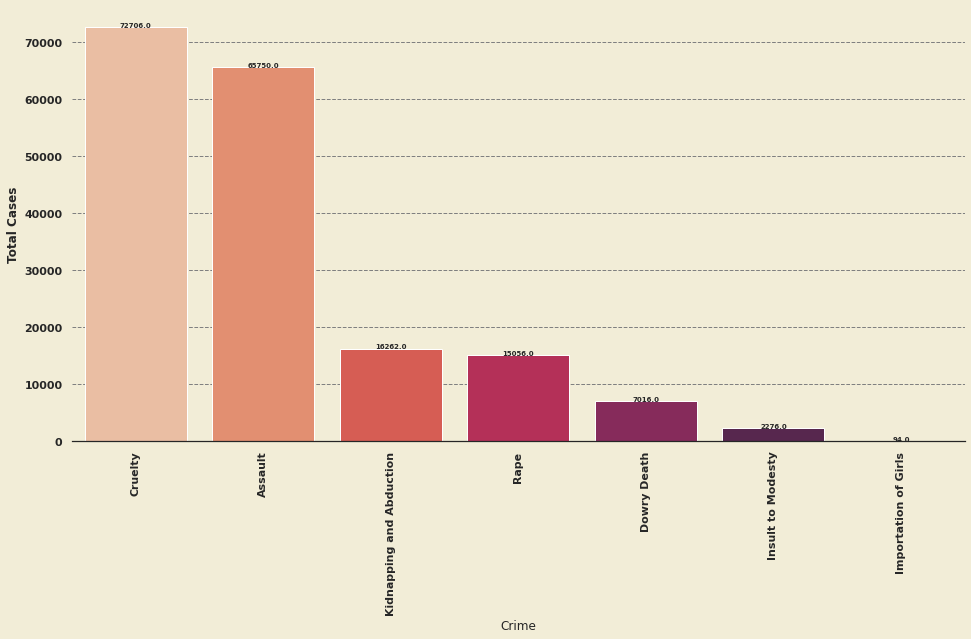

In [30]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))
ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df_total_crime_state,x="Crime",y='Total Cases',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel("Total Cases",fontweight='bold')
without_hue(df_total_crime_state,'Total Cases',a)
plt.show()

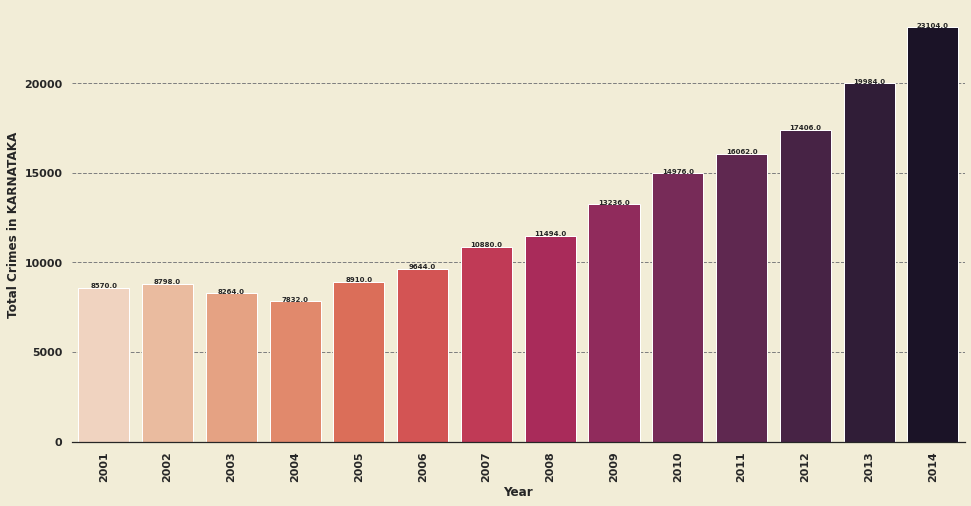

In [31]:
fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

A=sns.barplot(data=df_state, x=df_state.index, y='Total Crimes',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("Total Crimes in {}".format(state),fontweight='bold')
without_hue(df_state,'Total Crimes',A)
plt.show()

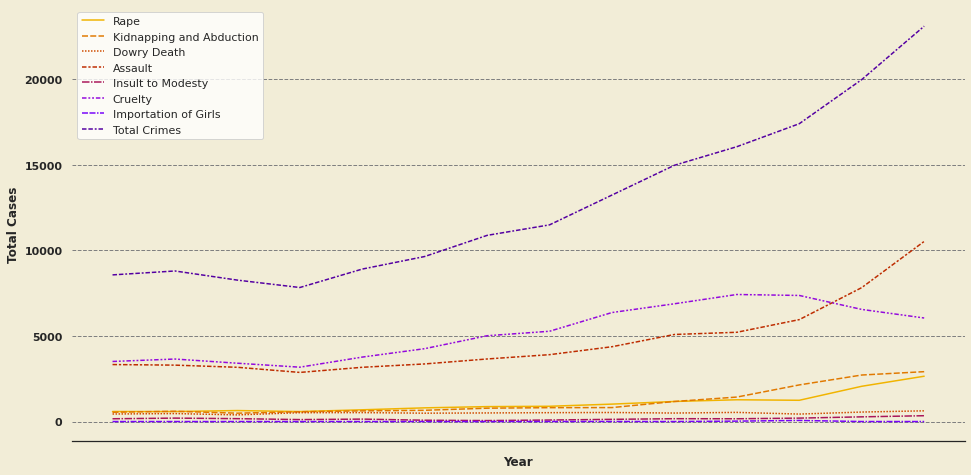

In [32]:
sns.set_theme(style='white',context='notebook')
fig=plt.figure(figsize=(16,8))
ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')
A=sns.lineplot(data=df_state, palette='gnuplot_r',linestyle="dashed")

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("Total Cases",fontweight='bold')
plt.show()

In [33]:
df_state_crime = df_state.loc[[2001, 2014]]
df_state_crime

,Rape,Kidnapping and Abduction,Dowry Death,Assault,Insult to Modesty,Cruelty,Importation of Girls,Total Crimes
Year,,,,,,,,
2001,586,542,440,3330,162,3510,0,8570
2014,2648,2914,626,10526,340,6050,0,23104


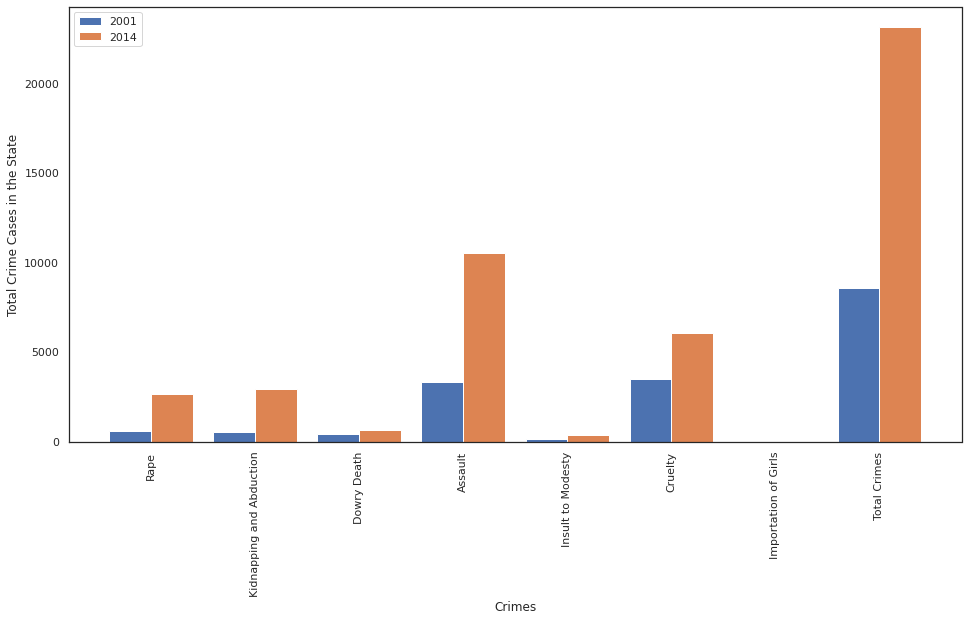

In [34]:
A = [x for x in df_state_crime.iloc[0] ]
B = [x for x in df_state_crime.iloc[1] ]

X_axis = np.arange(len(crimes))
plt.figure(figsize=(16,8))
plt.bar(X_axis - 0.2, A, 0.4, label = '2001')
plt.bar(X_axis + 0.2, B, 0.4, label = '2014')
  
plt.xticks(X_axis, crimes,rotation = 'vertical')
plt.xlabel("Crimes")
plt.ylabel("Total Crime Cases in the State")
plt.legend()
plt.show()

## **REGRESSION**

In [35]:
crime = "Total Crimes"

In [36]:
district = "BANGALORE COMMR."
df_district = df[df["DISTRICT"]==district]
df_district.reset_index(drop=True, inplace = True)

In [37]:
df_district

,STATE,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Death,Assault,Insult to Modesty,Cruelty,Importation of Girls,Total Crimes
0,KARNATAKA,BANGALORE COMMR.,2001,40,56,40,223,51,229,0,639
1,KARNATAKA,BANGALORE COMMR.,2002,32,58,33,237,62,242,0,664
2,KARNATAKA,BANGALORE COMMR.,2003,34,11,34,213,39,213,0,544
3,KARNATAKA,BANGALORE COMMR.,2004,32,61,44,151,35,227,0,550
4,KARNATAKA,BANGALORE COMMR.,2005,38,25,39,167,39,287,0,595
5,KARNATAKA,BANGALORE COMMR.,2006,33,29,50,143,2,290,0,547
6,KARNATAKA,BANGALORE COMMR.,2007,62,35,54,187,2,290,0,630
7,KARNATAKA,BANGALORE COMMR.,2008,54,2,52,179,1,307,0,595
8,KARNATAKA,BANGALORE COMMR.,2009,65,2,50,251,35,367,0,770
9,KARNATAKA,BANGALORE COMMR.,2010,65,29,52,308,50,398,0,902


In [38]:
df_district["t"] = [x for x in range(1,14)]
df_district["t_square"] = [x**2 for x in df_district["t"]]
df_district["log"] = [np.log(x) for x in df_district[crime]]

<ipython-input-38-52eccee09eaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_district["t"] = [x for x in range(1,14)]
<ipython-input-38-52eccee09eaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_district["t_square"] = [x**2 for x in df_district["t"]]
<ipython-input-38-52eccee09eaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [39]:
Train, Test = df_district.head(10), df_district.tail(3)

In [40]:
Train

,STATE,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Death,Assault,Insult to Modesty,Cruelty,Importation of Girls,Total Crimes,t,t_square,log
0,KARNATAKA,BANGALORE COMMR.,2001,40,56,40,223,51,229,0,639,1,1,6.459904
1,KARNATAKA,BANGALORE COMMR.,2002,32,58,33,237,62,242,0,664,2,4,6.498282
2,KARNATAKA,BANGALORE COMMR.,2003,34,11,34,213,39,213,0,544,3,9,6.298949
3,KARNATAKA,BANGALORE COMMR.,2004,32,61,44,151,35,227,0,550,4,16,6.309918
4,KARNATAKA,BANGALORE COMMR.,2005,38,25,39,167,39,287,0,595,5,25,6.388561
5,KARNATAKA,BANGALORE COMMR.,2006,33,29,50,143,2,290,0,547,6,36,6.304449
6,KARNATAKA,BANGALORE COMMR.,2007,62,35,54,187,2,290,0,630,7,49,6.445720
7,KARNATAKA,BANGALORE COMMR.,2008,54,2,52,179,1,307,0,595,8,64,6.388561
8,KARNATAKA,BANGALORE COMMR.,2009,65,2,50,251,35,367,0,770,9,81,6.646391
9,KARNATAKA,BANGALORE COMMR.,2010,65,29,52,308,50,398,0,902,10,100,6.804615


**LINEAR**

In [41]:
import statsmodels.api as sm

In [42]:
linear_model = sm.OLS(Train[crime].tolist(), Train['t'].tolist()).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test[crime]) - np.array(pred_linear))**2))
rmse_linear

270.5161189176242

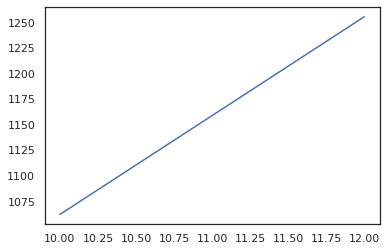

In [43]:
plt.plot(pred_linear)

**QUADRATIC**

In [44]:
quad_model = sm.OLS(Train[crime].tolist(), (Train['t'] + Train['t_square']).tolist()).fit()
pred_quad = pd.Series( quad_model.predict(Test["t"] + Test["t_square"]) )
rmse_quad = np.sqrt(np.mean((np.array(Test[crime]) - np.array(pred_quad))**2))
rmse_quad

150.08792089446578

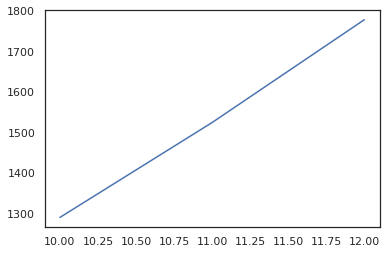

In [45]:
plt.plot(pred_quad)

In [46]:
data = {"MODEL":pd.Series(["rmse_linear", "rmse_quad"]),"RMSE_Values":pd.Series([rmse_linear, rmse_quad])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,270.516119
1,rmse_quad,150.087921


## **ARIMA**

In [47]:
!pip install pmdarima
import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 6.6 MB/s 
     |████████████████████████████████| 9.9 MB 52.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


**STATE**

In [48]:
state = "KARNATAKA"
crime = "Total Crimes"

In [49]:
arima_1 = df[df["STATE"] == state].groupby("Year").sum()
arima_1 = arima_1[crime]

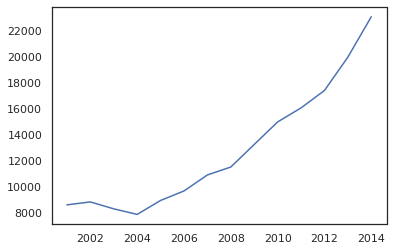

In [50]:
plt.plot(arima_1)

In [51]:
A = pm.auto_arima(arima_1, start_p=0, start_q=0, d=1, max_p = 3, max_q = 3, seasonal = False, trace = True)
A.fit(arima_1)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=220.799, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=222.016, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=221.637, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=229.172, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=223.844, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.325 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [52]:
forecast_1=A.predict(n_periods = 5)
frame={crime:forecast_1, 'Year':[x for x in range(2015,2020)]}
arima_forecast_1=pd.DataFrame(frame)
arima_forecast_1=arima_forecast_1.set_index('Year')
arima_forecast_1[crime] = [int(x) for x in arima_forecast_1[crime]]

arima_forecast_1

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # Handle slices (if the given index keys cover more than one date)


,Total Crimes
Year,
2015,24222
2016,25340
2017,26458
2018,27576
2019,28694


**DISTRICT**

In [53]:
district = "BANGALORE COMMR."

In [54]:
arima_2 = df[df['DISTRICT']== district]
arima_2.set_index('Year', inplace=True)
arima_2 = arima_2[crime]

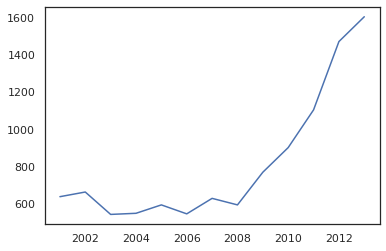

In [55]:
plt.plot(arima_2)

In [56]:
B = pm.auto_arima(arima_2, start_p=0, start_q=0, d=1, max_p = 3, max_q = 3, seasonal = False, trace = True)
B.fit(arima_2)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=154.128, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=153.774, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=154.465, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=156.221, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=154.349, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=153.398, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=153.099, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=154.865, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=155.029, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=154.166, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.269 seconds


ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [57]:
forecast_2=B.predict(n_periods = 5)
frame={"Total Crimes":forecast_2, 'Year':[x for x in range(2015,2020)]}
arima_forecast_2=pd.DataFrame(frame)
arima_forecast_2=arima_forecast_2.set_index('Year')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # Handle slices (if the given index keys cover more than one date)


In [58]:
arima_forecast_2['Total Crimes'] = [int(x) for x in arima_forecast_2['Total Crimes']]
arima_forecast_2

,Total Crimes
Year,
2015,1843
2016,1983
2017,2155
2018,2281
2019,2412


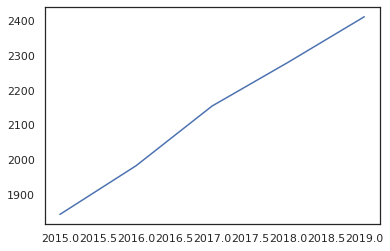

In [59]:
plt.plot(arima_forecast_2)
plt.show()